In [2]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [6, 7]

n = 100
np.random.seed(12)
v_1 = np.linspace(10, 100, 10, dtype=int)
v_2 = np.linspace(5, 30, 6, dtype=int)
v_3 = np.linspace(4, 12, 8, dtype=int)

In [4]:
def solve_linear(matrix_type, v):
    errors = []
    cond_infnorm = []
    cond_2norm = []
    for n_1 in v:
        if matrix_type == 'random':
            A = np.random.rand(n_1, n_1)
            s = "random matrixes"
        elif matrix_type == 'vandermonde':
            x = np.linspace(1, n_1, n_1)
            A = np.vander(x)
            s = "vandermonde matrixes"
        elif matrix_type == 'hilbert':
            A = scipy.linalg.hilbert(n_1)
            s = "hilbert matrixes"
        else:
            ValueError("Type 0 for random matrix, 1 for vander matrix, 2 for hilbert matrix")

        x_true = np.ones((n_1, 1))
        b_1 = A @ x_true
        x = np.linalg.solve(A, b_1)
        error = (np.linalg.norm(x - x_true, 2)) / (np.linalg.norm(x_true, 2))
        cond2norm = np.linalg.cond(A, 2)
        condinfnorm = np.linalg.cond(A, np.inf)
        errors.append(error)
        cond_infnorm.append(cond2norm)
        cond_2norm.append(condinfnorm)

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    fig.tight_layout(pad=3.0) 
    
    ax1.title.set_text(s + " solution relative error")
    ax1.plot(v, errors, label="error")
    ax1.legend(loc='upper left')
    ax1.set_xlabel('matrix dimension')
    ax1.set_yscale('log')
    
    ax2.title.set_text(s + " conditioning numbers")
    ax2.plot(v, cond_infnorm, label="infinity norm")
    ax2.plot(v, cond_2norm, label='2-norm')
    ax2.legend(loc='upper left')
    ax2.set_xlabel('matrix dimension')
    ax2.set_yscale('log')
    
    plt.show()

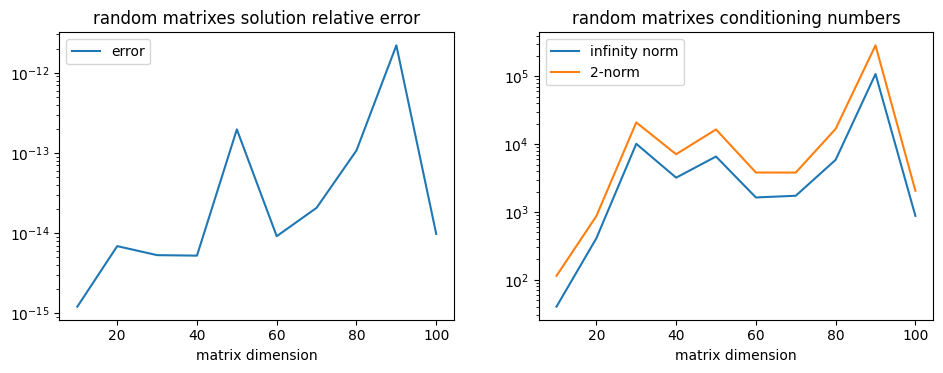

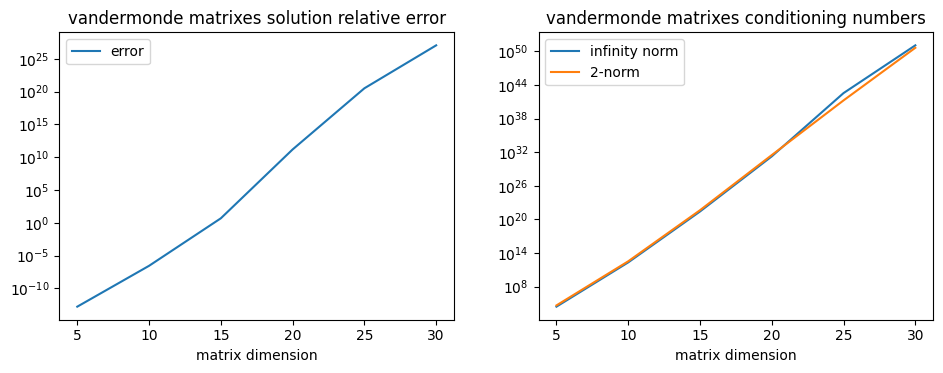

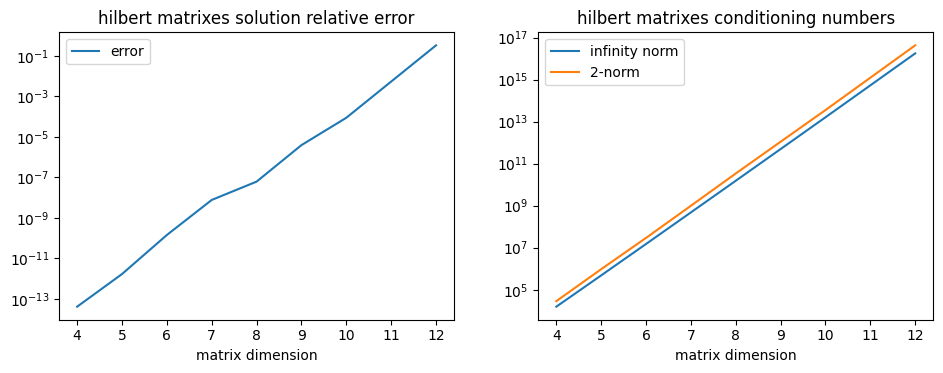

In [5]:
solve_linear('random', v_1)
solve_linear('vandermonde', v_2)
solve_linear('hilbert', v_3)

FLOATING POINT 

In [6]:
diff = 1
i=0
while 1 + diff > 1:
    i = i +  1
    diff = diff / 2
diff = diff * 2
print("epsilon value: " + str(diff))
print("iterations performed: ",i)

epsilon value: 2.220446049250313e-16
iterations performed:  53


In [7]:
import sys
print(np.finfo(float).eps)

2.220446049250313e-16


SEQUENCE LIMIT

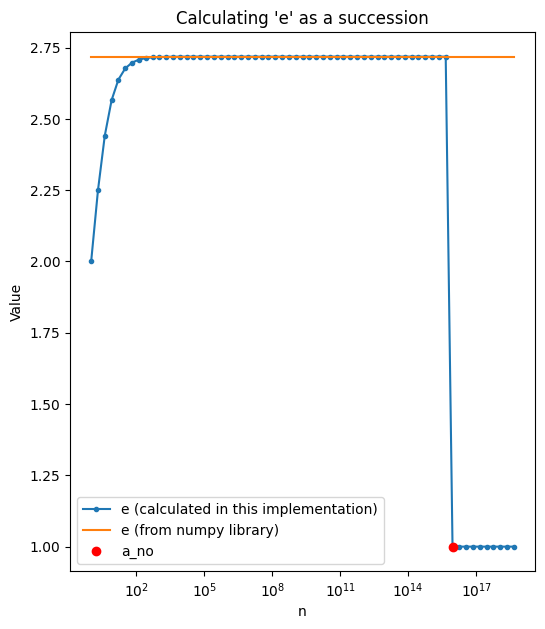

In [8]:
e = []
x = []
i = 1
a_n = (1 + (1 / i)) ** i

over_iter = 10

while (a_n != 1) or (over_iter>0):
    x.append(i)
    a_n = (1 + (1/i)) ** i
    e.append(a_n)
    i = i * 2
    
    if (a_n == 1):
        if (over_iter == 10):
            x_pos = x[-1]
            y_pos = e[-1]
        over_iter = over_iter - 1
    
    

plt.plot(x, e, '.-', label="e (calculated in this implementation)")
plt.plot(x, np.ones(len(e)) * np.e,label="e (from numpy library)")
plt.title("Calculating 'e' as a succession")
plt.xlabel("n")
plt.ylabel("Value")
plt.xscale("log")
#hold on;
plt.plot(x_pos,y_pos,'ro', label = 'a_no')
plt.legend()
plt.show()

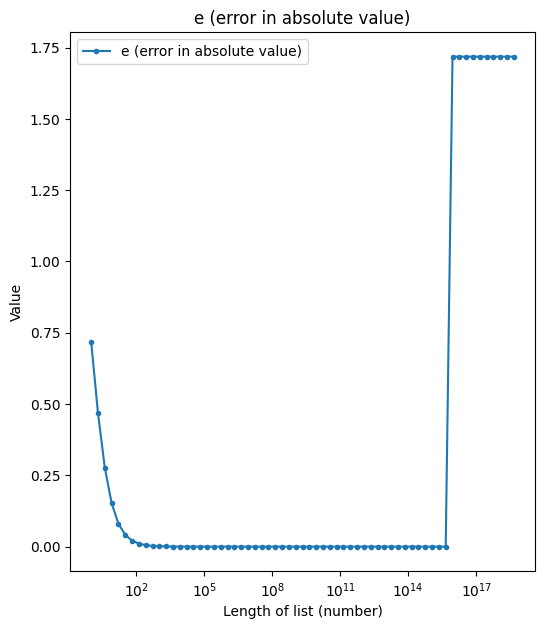

In [10]:
err = abs((np.ones(len(e))* np.e) - e)

plt.plot(x, err, '.-', label="e (error in absolute value)")
plt.title("e (error in absolute value)")
plt.xlabel("Length of list (number)")
plt.ylabel("Value")
plt.xscale("log")
plt.legend()
plt.show()

In [9]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

print("Matrix A   Rank: " + str(np.linalg.matrix_rank(A))+ "         Maximum rank possible: " + str(min(A.shape)) + "  Eigenvalues: " + str(np.linalg.eig(A)[0]))
print("Matrix B   Rank: " + str(np.linalg.matrix_rank(B))+ "         Maximum rank possible: " + str(min(B.shape)) + "  Eigenvalues: " + str(np.linalg.eig(B)[0]))
print("\n")

C = np.array([[0, 0, 1], [0, 1, 0], [0, 4, 4]])
D = np.array([[0, 4, 0], [1, 0, 0], [3, 7, 9]])
print("Matrix C   Rank: " + str(np.linalg.matrix_rank(C))+ "         Maximum rank possible: " + str(min(C.shape)) + "  Eigenvalues: " + str(np.linalg.eig(C)[0]))
print("Matrix D   Rank: " + str(np.linalg.matrix_rank(D))+ "         Maximum rank possible: " + str(min(D.shape)) + "  Eigenvalues: " + str(np.linalg.eig(D)[0]))


Matrix A   Rank: 2         Maximum rank possible: 2  Eigenvalues: [5. 2.]
Matrix B   Rank: 1         Maximum rank possible: 2  Eigenvalues: [5. 0.]


Matrix C   Rank: 2         Maximum rank possible: 3  Eigenvalues: [0. 4. 1.]
Matrix D   Rank: 3         Maximum rank possible: 3  Eigenvalues: [ 9.  2. -2.]
